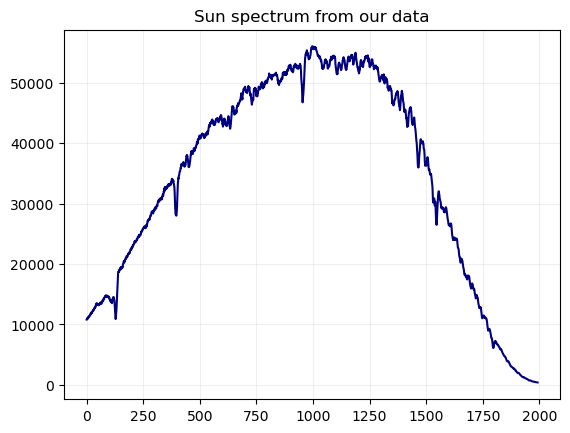

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from imageio import imwrite, imread
from matplotlib.pyplot import figure, show, close, xlabel, ylabel, title
from scipy.constants import k, h, c, e
import sympy as sp
from scipy.optimize import curve_fit
from astropy.visualization import simple_norm, MinMaxInterval

sun_data = np.loadtxt("Moon.txt", comments="#")

fig = figure()
frame = fig.add_subplot(1, 1, 1)
frame.plot(sun_data, color="navy", label="Vega spectrum")
frame.set_title("Sun spectrum from our data")
frame.grid(alpha=0.2)
show()
close(fig)

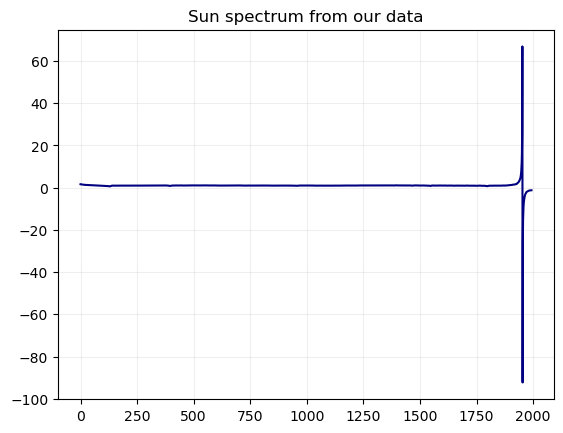

In [8]:
# fitting a polynomial function to the sun spectrum to obtain a graph with no continuum

poly_degree = 5

# extracting the wavelength (x) and intensity (y) data
wavelength = np.arange(np.size(sun_data))
intensity = sun_data

# fitting a polynomial
coefficients = np.polyfit(wavelength, intensity, poly_degree)
poly_fit = np.poly1d(coefficients)

continuum_fit = poly_fit(wavelength)
normalized_data = intensity / continuum_fit

fig = figure()
frame = fig.add_subplot(1, 1, 1)
frame.plot(wavelength,normalized_data, color="navy", label="Vega spectrum")
frame.set_title("Sun spectrum from our data")
frame.grid(alpha=0.2)
show()
close(fig)

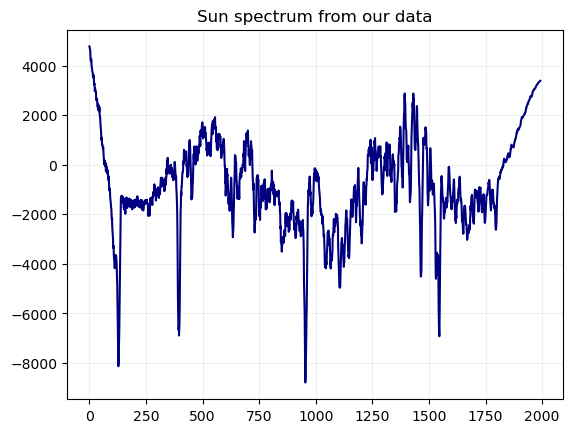

In [9]:
window_size = 50
local_maxima_wavelengths = []
local_maxima_intensities = []

for i in range(0, len(wavelength) - window_size, window_size):
    window = intensity[i:i + window_size]
    local_max_idx = np.argmax(window)
    local_maxima_wavelengths.append(wavelength[i + local_max_idx])
    local_maxima_intensities.append(window[local_max_idx])

poly_degree = 5
coefficients = np.polyfit(local_maxima_wavelengths, local_maxima_intensities, poly_degree)
poly_fit = np.poly1d(coefficients)

continuum_fit = poly_fit(wavelength)

# normalising the data by dividing by the polynomial fit
normalized_data = intensity -continuum_fit

fig = figure()
frame = fig.add_subplot(1, 1, 1)
frame.plot(wavelength,normalized_data, color="navy", label="Vega spectrum")
frame.set_title("Sun spectrum from our data")
frame.grid(alpha=0.2)
show()
close(fig)
